# Anime Ratings Analysis

**Importing the necessary libraries datasets**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
anime_details = pd.read_csv('Data/anime.csv')
anime_ratings = pd.read_csv('Data/anime_rating.csv')

**Creating dictionaries to be used for styling the index, data and the caption**

In [5]:
headers = {
    'selector': 'th:not(.index_name)',
    'props': [('background-color', '#474440'), ('color', 'white'),('text-align', 'left')]
}

caption = {
    'selector': 'caption',
    'props': [('font-weight', 'bold'), ('color', '#363445'),('text-align', 'center')]
}

cells = {  # for row hover use <tr> instead of <td>
    'selector': 'tr',
    'props': [('background-color', '#d7e1ee'), ('color', 'black'),('text-align', 'left')]
}

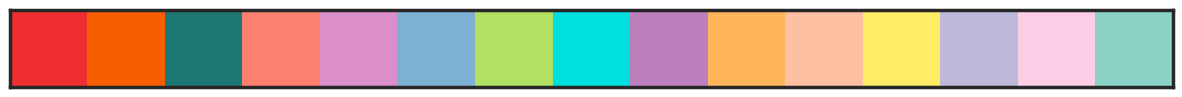

In [6]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

colors = ["#ee2e31", "#f85e00" ,"#1d7874", "#fd7f6f", "#db8eca", "#7eb0d5", "#b2e061", "#00dfdf", "#bd7ebe", "#ffb55a", "#ffbfa3", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
sns.palplot(sns.color_palette(colors))

### Descriptive Analysis

**Summarizing and cleaning anime_data**

In [7]:
anime_details.sort_values(by='anime_id').head().style.set_table_styles([headers,cells,caption]).hide(axis="index")\
    .format(precision=2).set_caption("Let's take a look at the anime dataset")

anime_id,name,genre,type,episodes,rating,total_members,studio
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,Sunrise
5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636,Bones
6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,Madhouse
7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",TV,26,7.36,64905,Sunrise
8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848,Toei Animation


In [8]:
anime_details.shape

(12277, 8)

In [9]:
anime_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12277 entries, 0 to 12276
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       12277 non-null  int64  
 1   name           12277 non-null  object 
 2   genre          12216 non-null  object 
 3   type           12253 non-null  object 
 4   episodes       12277 non-null  object 
 5   rating         12048 non-null  float64
 6   total_members  12277 non-null  int64  
 7   studio         7673 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 767.4+ KB


In [10]:
anime_details['episodes'].value_counts().sort_index(ascending=False).head(10).to_frame().T\
    .style.set_table_styles([headers,cells,caption]) #checking the data in episodes column

,Unknown,99,98,97,96,95,94,93,92,91
episodes,337,2,1,3,4,2,3,1,1,2


In [11]:
anime_details['episodes']= anime_details['episodes'].replace('Unknown',np.nan) #Converting unknown to NaN values, as the value won't be useful for our analysis
anime_details['episodes']= anime_details['episodes'].astype(float) #Converting episodes column to float

In [12]:
#Checking the number of duplicate values
print(f"No.of duplicate values in anime_data: {anime_details[anime_details.duplicated()].shape[0]}")

No.of duplicate values in anime_data: 0


In [13]:
#Checking for null values and eliminating them
display(anime_details.isna().sum().to_frame('count').sort_values(by='count',ascending=False).T\
    .style.set_table_styles([headers,cells,caption]).set_caption("No. of null values"))

anime_details.dropna(inplace = True)

display(anime_details.isna().sum().to_frame('count').sort_values(by='count',ascending=False).T\
    .style.set_table_styles([headers,cells,caption]).set_caption("No. of null values after dropping them"))

,studio,episodes,rating,genre,type,anime_id,name,total_members
count,4604,337,229,61,24,0,0,0


,anime_id,name,genre,type,episodes,rating,total_members,studio
count,0,0,0,0,0,0,0,0


In [14]:
#Statistical glimpse of anime_details data
anime_details.describe(include='all').style.set_table_styles([headers,cells,caption]).set_caption("Summary of anime data").format(precision=2)

,anime_id,name,genre,type,episodes,rating,total_members,studio
count,7343.00,7343,7343,7343,7343.00,7343.00,7343.00,7343
unique,nan,7343,2670,6,nan,nan,nan,659
top,nan,Kimi no Na wa.,Comedy,TV,nan,nan,nan,Toei Animation
freq,nan,1,266,2993,nan,nan,nan,686
mean,11652.50,nan,nan,nan,14.88,6.85,29144.85,nan
std,10680.72,nan,nan,nan,47.16,0.84,68100.01,nan
min,1.00,nan,nan,nan,1.00,2.37,12.00,nan
25%,2411.50,nan,nan,nan,1.00,6.36,956.50,nan
50%,8145.00,nan,nan,nan,4.00,6.89,5208.00,nan
75%,19946.00,nan,nan,nan,13.00,7.42,24161.50,nan


**Summarizing and cleaning anime_ratings**

In [15]:
anime_ratings.sort_values(by='anime_id').head(10).style.set_table_styles([headers,cells,caption]).hide(axis="index")\
    .format(precision=2).set_caption("Let's take a look at the ratings dataset")

user_id,anime_id,rating
47485,1,8
10115,1,9
31698,1,10
52930,1,7
5315,1,7
41370,1,-1
68570,1,10
58344,1,10
36606,1,7
65723,1,7


In [16]:
anime_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [17]:
print(f"No.of duplicate values in anime_ratings: {anime_ratings[anime_ratings.duplicated()].shape[0]}")
anime_ratings.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate values there are {anime_ratings.shape[0]} rows")

No.of duplicate values in anime_ratings: 1
After removing duplicate values there are 7813736 rows


In [18]:
#Checking the range of ratings
anime_ratings['rating'].value_counts().to_frame('count').sort_index().T\
    .style.set_table_styles([headers,cells,caption])

,-1,1,2,3,4,5,6,7,8,9,10
count,1476496,16649,23150,41453,104291,282806,637775,1375287,1646018,1254096,955715


In [19]:
#Converting -1 to NaN. -1 is assigned to those anime which users have watched but haven't provided any rating
anime_ratings['rating'].replace(to_replace = -1 , value = np.nan ,inplace=True)

#Checking for null values and eliminating them
display(anime_ratings.isna().sum().to_frame('count').sort_values(by='count',ascending=False).T\
    .style.set_table_styles([headers,cells,caption]).set_caption("No. of null values"))

anime_ratings.dropna(inplace = True)
display(anime_ratings.isna().sum().to_frame('count').sort_values(by='count',ascending=False).T\
    .style.set_table_styles([headers,cells,caption]).set_caption("No. of null values after dropping them"))

,rating,user_id,anime_id
count,1476496,0,0


,user_id,anime_id,rating
count,0,0,0


In [20]:
#Statistical glimpse of anime_ratings data
anime_ratings.describe(include='all').style.set_table_styles([headers,cells,caption]).set_caption("Summary of anime data").format(precision=2)

,user_id,anime_id,rating
count,6337240.00,6337240.00,6337240.00
mean,36747.91,8902.87,7.81
std,21013.40,8882.00,1.57
min,1.00,1.00,1.00
25%,18984.00,1239.00,7.00
50%,36815.00,6213.00,8.00
75%,54873.00,14075.00,9.00
max,73516.00,34475.00,10.00


<AxesSubplot:xlabel='type', ylabel='rating'>

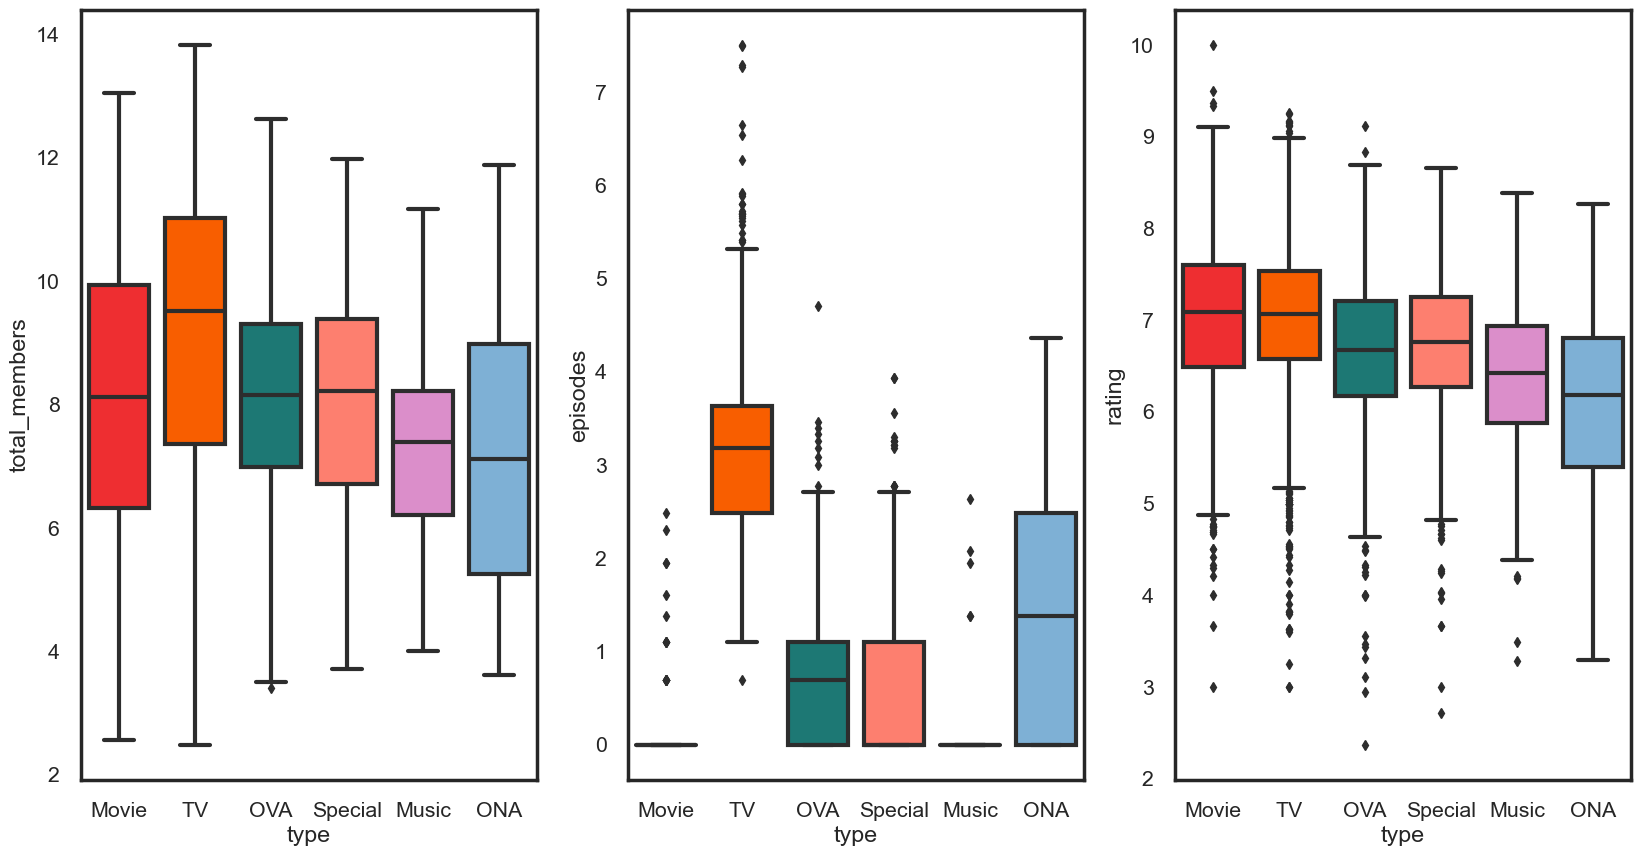

In [21]:
#Checking for outliers
fig, axes = plt.subplots(1, 3, figsize = (20, 10))
sns.boxplot(x=anime_details['type'],y=np.log(anime_details['total_members']),ax=axes[0],palette=colors, saturation=4)
sns.boxplot(x=anime_details['type'],y=np.log(anime_details['episodes']),ax=axes[1],palette=colors, saturation=4)
sns.boxplot(x=anime_details['type'],y=anime_details['rating'],ax=axes[2],palette=colors, saturation=4)

In [22]:
#Verifying if the outliers are actually that or if we can use the data without excluding them 
anime_details.query("(type == 'Movie' or type == 'Music') & episodes>1").sort_values(by=['type','episodes'],ascending=False)\
    .style.set_table_styles([headers,cells,caption]).set_caption("Checking the possible outliers").hide(axis=0)

anime_id,name,genre,type,episodes,rating,total_members,studio
5016,Fluximation,Music,Music,14.000000,6.740000,2240,Studio 4°C
4705,Tengen Toppa Gurren Lagann: Parallel Works,Music,Music,8.000000,7.270000,22213,Gainax
8348,Tengen Toppa Gurren Lagann: Parallel Works 2,"Mecha, Music",Music,7.000000,7.090000,13361,Gainax
1998,Amazing Nuts!,"Adventure, Music, Police, Romance, Sci-Fi",Music,4.000000,6.740000,6650,Studio 4°C
3642,Shina Dark: Kuroki Tsuki no Ou to Souheki no Tsuki no Himegimi,"Ecchi, Fantasy, Harem, Music",Music,4.000000,6.230000,3730,Shaft
18755,Donyatsu,"Comedy, Sci-Fi, Seinen",Movie,12.000000,6.270000,2168,Gathering
31020,Norasco: Cinema Point Card-hen,"Comedy, Slice of Life",Movie,10.000000,6.860000,57,Kachidoki Studio
3508,Genius Party,"Action, Dementia, Fantasy, Mecha, Music, Psychological, Romance, Sci-Fi",Movie,7.000000,7.390000,18612,Studio 4°C
23697,Kara no Kyoukai: Manner Movies,"Action, Comedy",Movie,7.000000,6.490000,5367,ufotable
6795,Genius Party Beyond,"Dementia, Fantasy, Music, Sci-Fi",Movie,5.000000,7.390000,10660,Studio 4°C


**Merging the datasets**

In [23]:
anime_merged = pd.merge(anime_details,anime_ratings,on="anime_id",suffixes= [None, "_user"])
anime_merged = anime_merged.rename(columns={"rating_user": "user_rating"})

anime_merged.head().style.set_table_styles([headers,cells,caption]).set_caption("Let's take a look at the merged Dataset")

,anime_id,name,genre,type,episodes,rating,total_members,studio,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,CoMix Wave Films,99,5.000000
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,CoMix Wave Films,152,10.000000
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,CoMix Wave Films,244,10.000000
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,CoMix Wave Films,271,10.000000
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,CoMix Wave Films,322,10.000000


In [24]:
print(anime_merged.shape)
anime_merged_temp = anime_merged.copy()

(6204567, 10)


In [25]:
anime_merged_temp = anime_merged_temp.groupby(by= ['anime_id','name','genre','type','episodes','rating','total_members','studio']).agg({'user_id':'size', 'user_rating':'mean'}) \
       .rename(columns={'user_id':'users_count','user_rating':'average_rating'})\
       .reset_index()

**Data Visualization**

In [26]:
set1 = anime_merged_temp.sort_values(["total_members"],ascending=False)
set1.head().head().style.set_table_styles([headers,cells,caption])

,anime_id,name,genre,type,episodes,rating,total_members,studio,users_count,average_rating
1225,1535,Death Note,"Mystery, Police, Psychological, Supernatural, Thriller",TV,37.000000,8.710000,1013917,Madhouse,34226,8.834629
4947,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.000000,8.540000,896229,Wit Studio,25289,8.725770
4412,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.000000,7.830000,893100,A-1 Pictures,26310,8.140213
2922,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64.000000,9.260000,793665,Bones,21494,9.322741
3286,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.000000,8.390000,717796,P.A. Works,23565,8.549714


In [27]:
set2 = anime_merged_temp.sort_values(["users_count", "average_rating"],ascending=False)
set2.head().head().style.set_table_styles([headers,cells,caption])

,anime_id,name,genre,type,episodes,rating,total_members,studio,users_count,average_rating
1225,1535,Death Note,"Mystery, Police, Psychological, Supernatural, Thriller",TV,37.000000,8.710000,1013917,Madhouse,34226,8.834629
4412,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.000000,7.830000,893100,A-1 Pictures,26310,8.140213
4947,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.000000,8.540000,896229,Wit Studio,25289,8.725770
1259,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super Power",TV,25.000000,8.830000,715151,Sunrise,24126,8.927796
3286,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.000000,8.390000,717796,P.A. Works,23565,8.549714


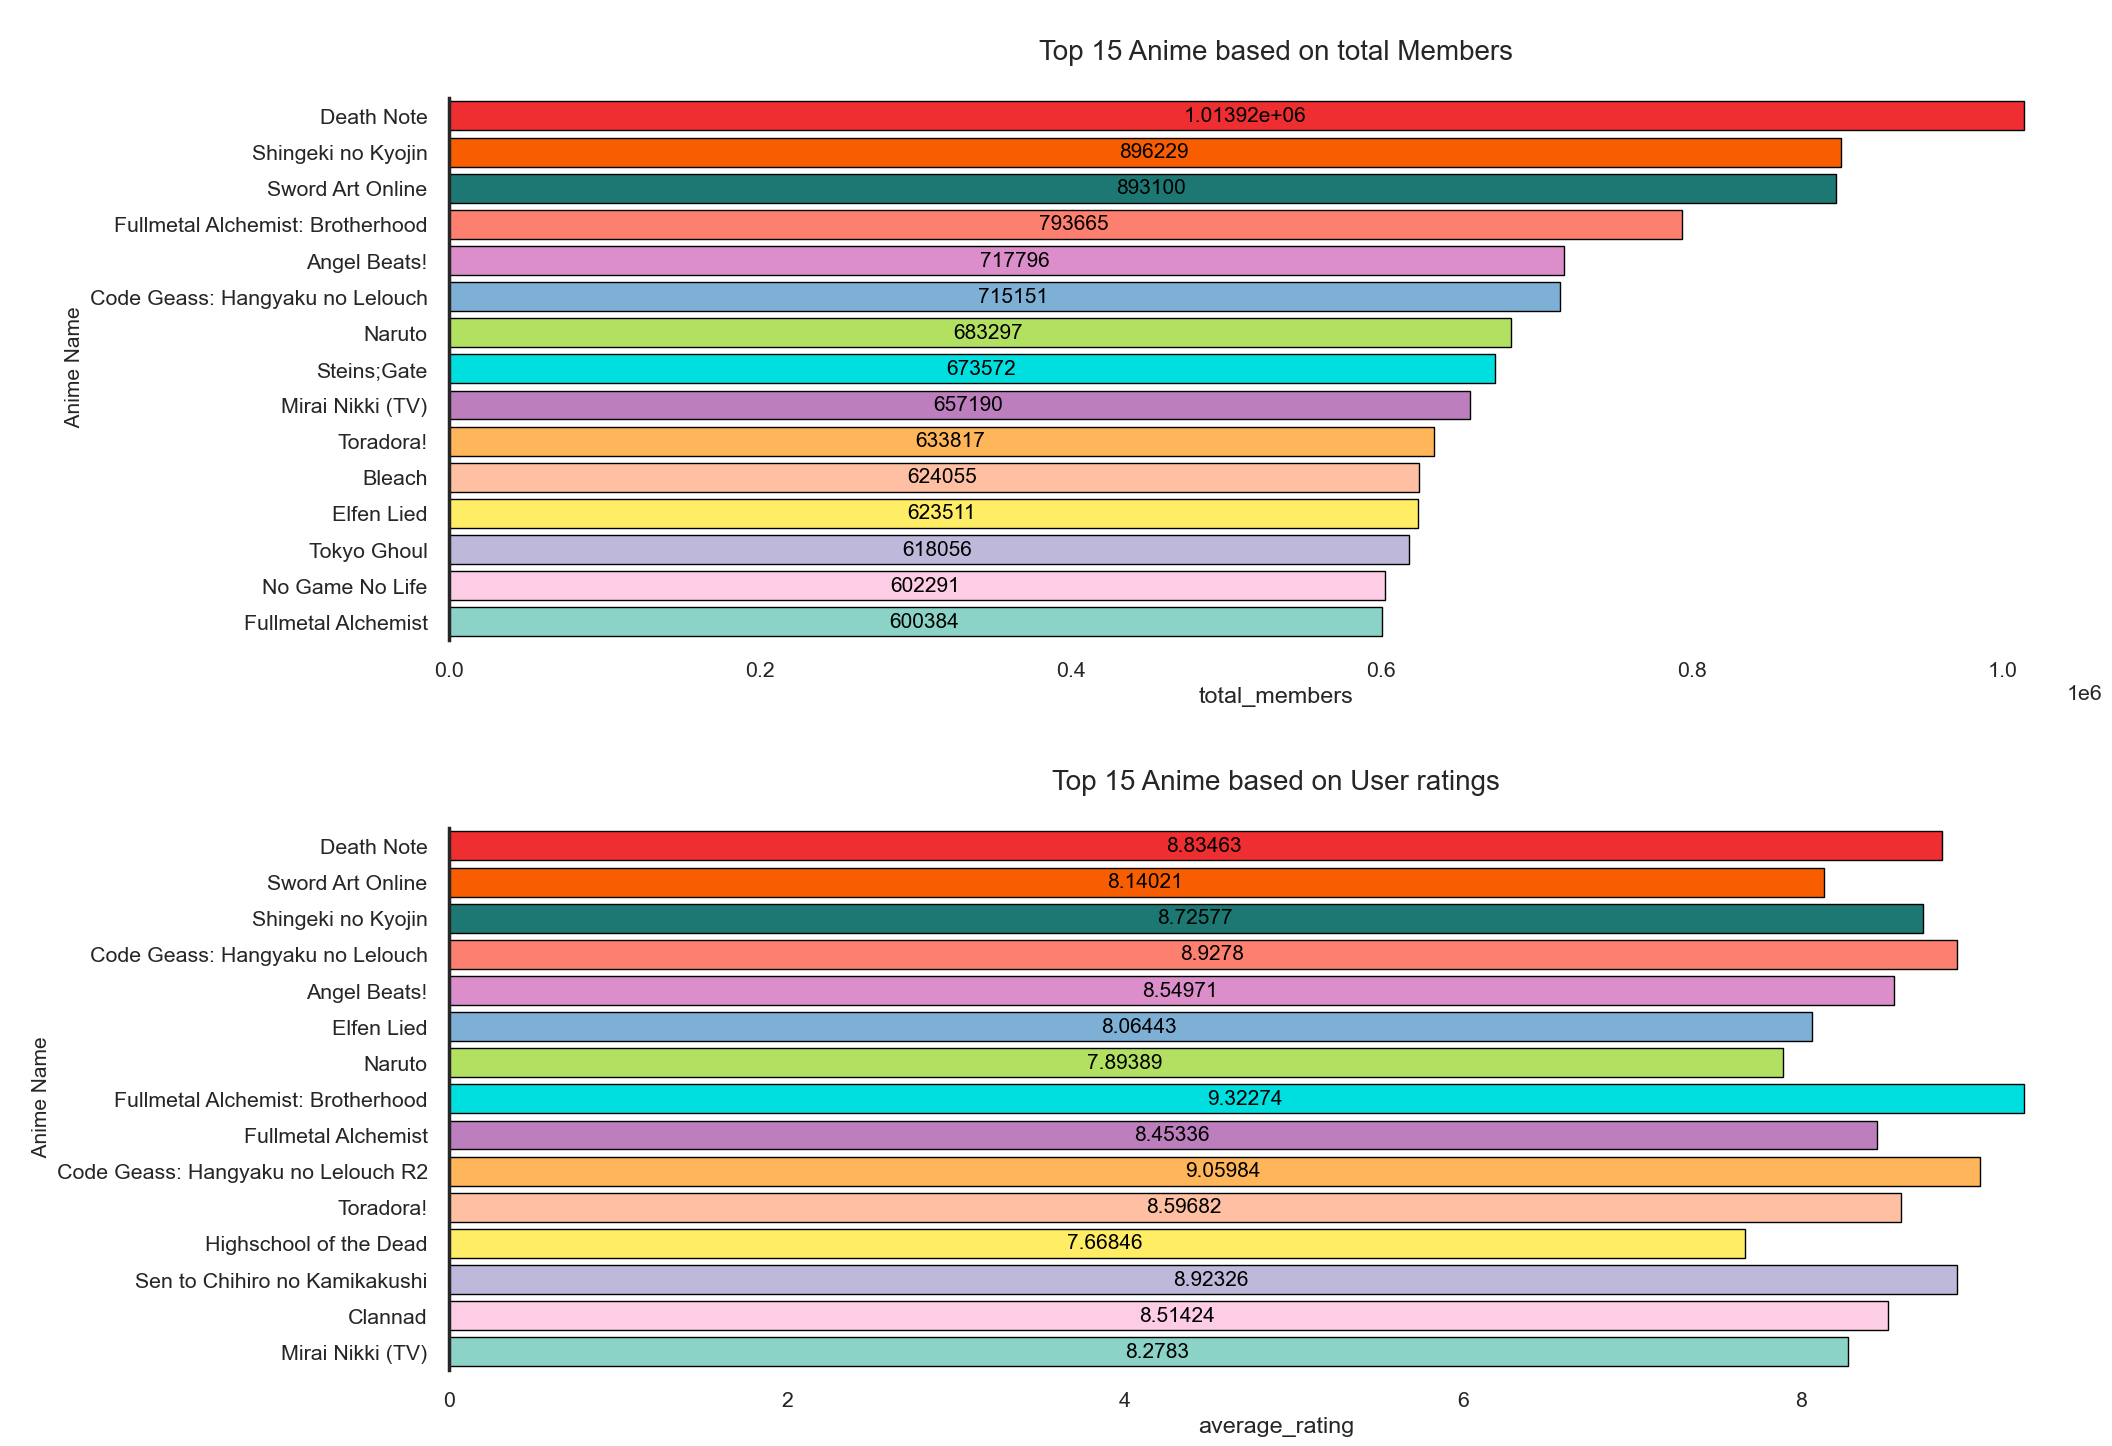

In [28]:
_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

plot_1 = sns.barplot(x=set1["total_members"], y=set1["name"][:15], ax=axs[0], palette=colors, label="Total", color="b", orient = 'h', edgecolor = "black", linewidth = 1,saturation=4)
axs[0].set_ylabel("\n Anime Name", fontsize = 15)
axs[0].set_title("\nTop 15 Anime based on total Members\n",fontsize = 20)
sns.despine(bottom=True)

for container in plot_1.containers:
    plot_1.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black")

plot_2 = sns.barplot(x=set2["average_rating"], y=set2["name"][:15], ax=axs[1], palette=colors, label="Total", color="b", orient = 'h', edgecolor = "black", linewidth = 1,saturation=4)
axs[1].set_ylabel("\n Anime Name", fontsize = 15)
axs[1].set_title("\nTop 15 Anime based on User ratings\n",fontsize = 20)
sns.despine(bottom=True)

for container in plot_2.containers:
    plot_2.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black")

plt.show()

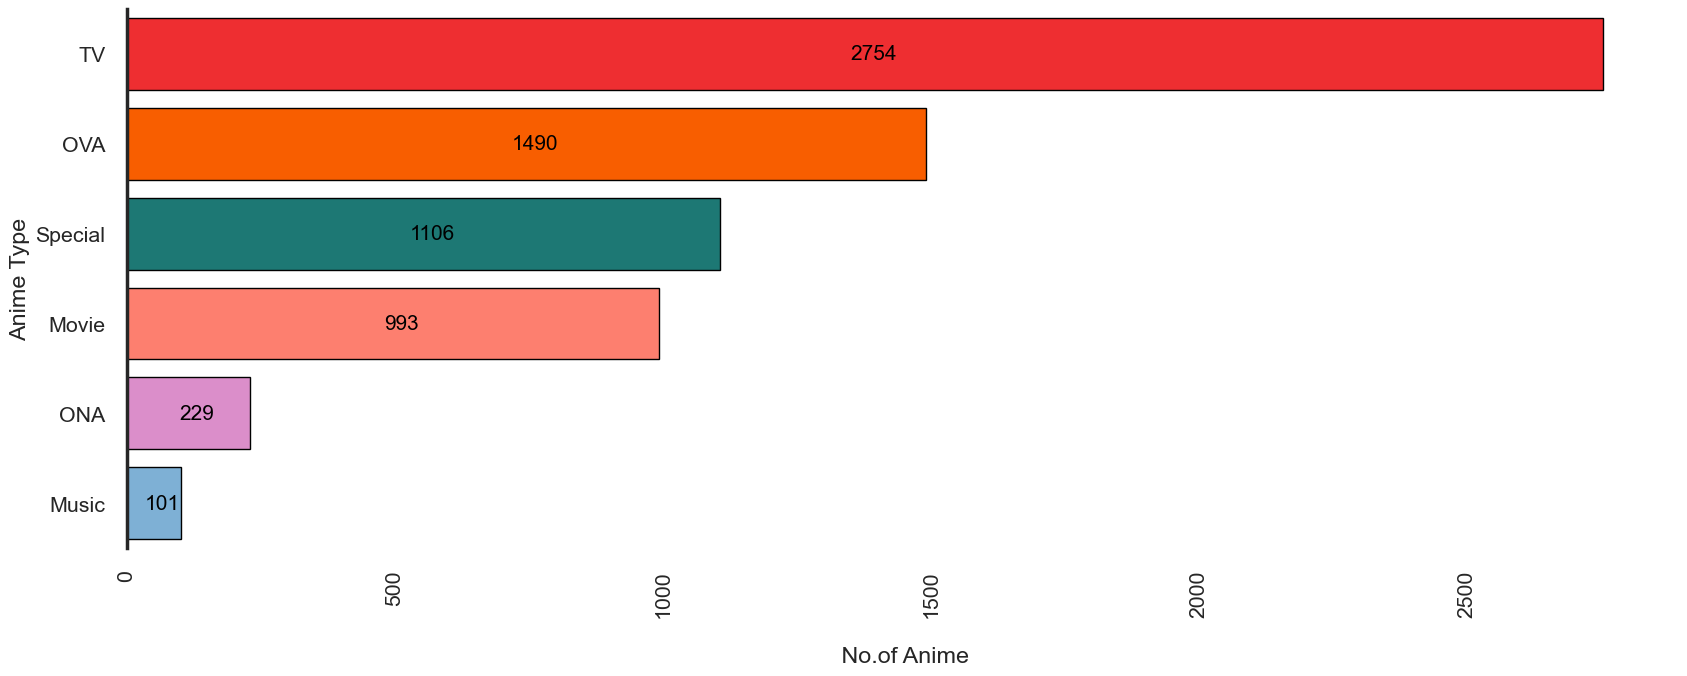

In [29]:
f, ax = plt.subplots(figsize=(20, 7))
plot_2 = sns.countplot(y=set1['type'],order = set1["type"].value_counts().index, palette=colors, label="Total", color="b", orient = 'h', edgecolor = "black", linewidth = 1,saturation=4)
plt.xticks(rotation = 90)

plt.xlabel("\n No.of Anime")
plt.ylabel("Anime Type")
sns.despine(bottom=True)

for container in plot_2.containers:
    plot_2.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black")
plt.show()

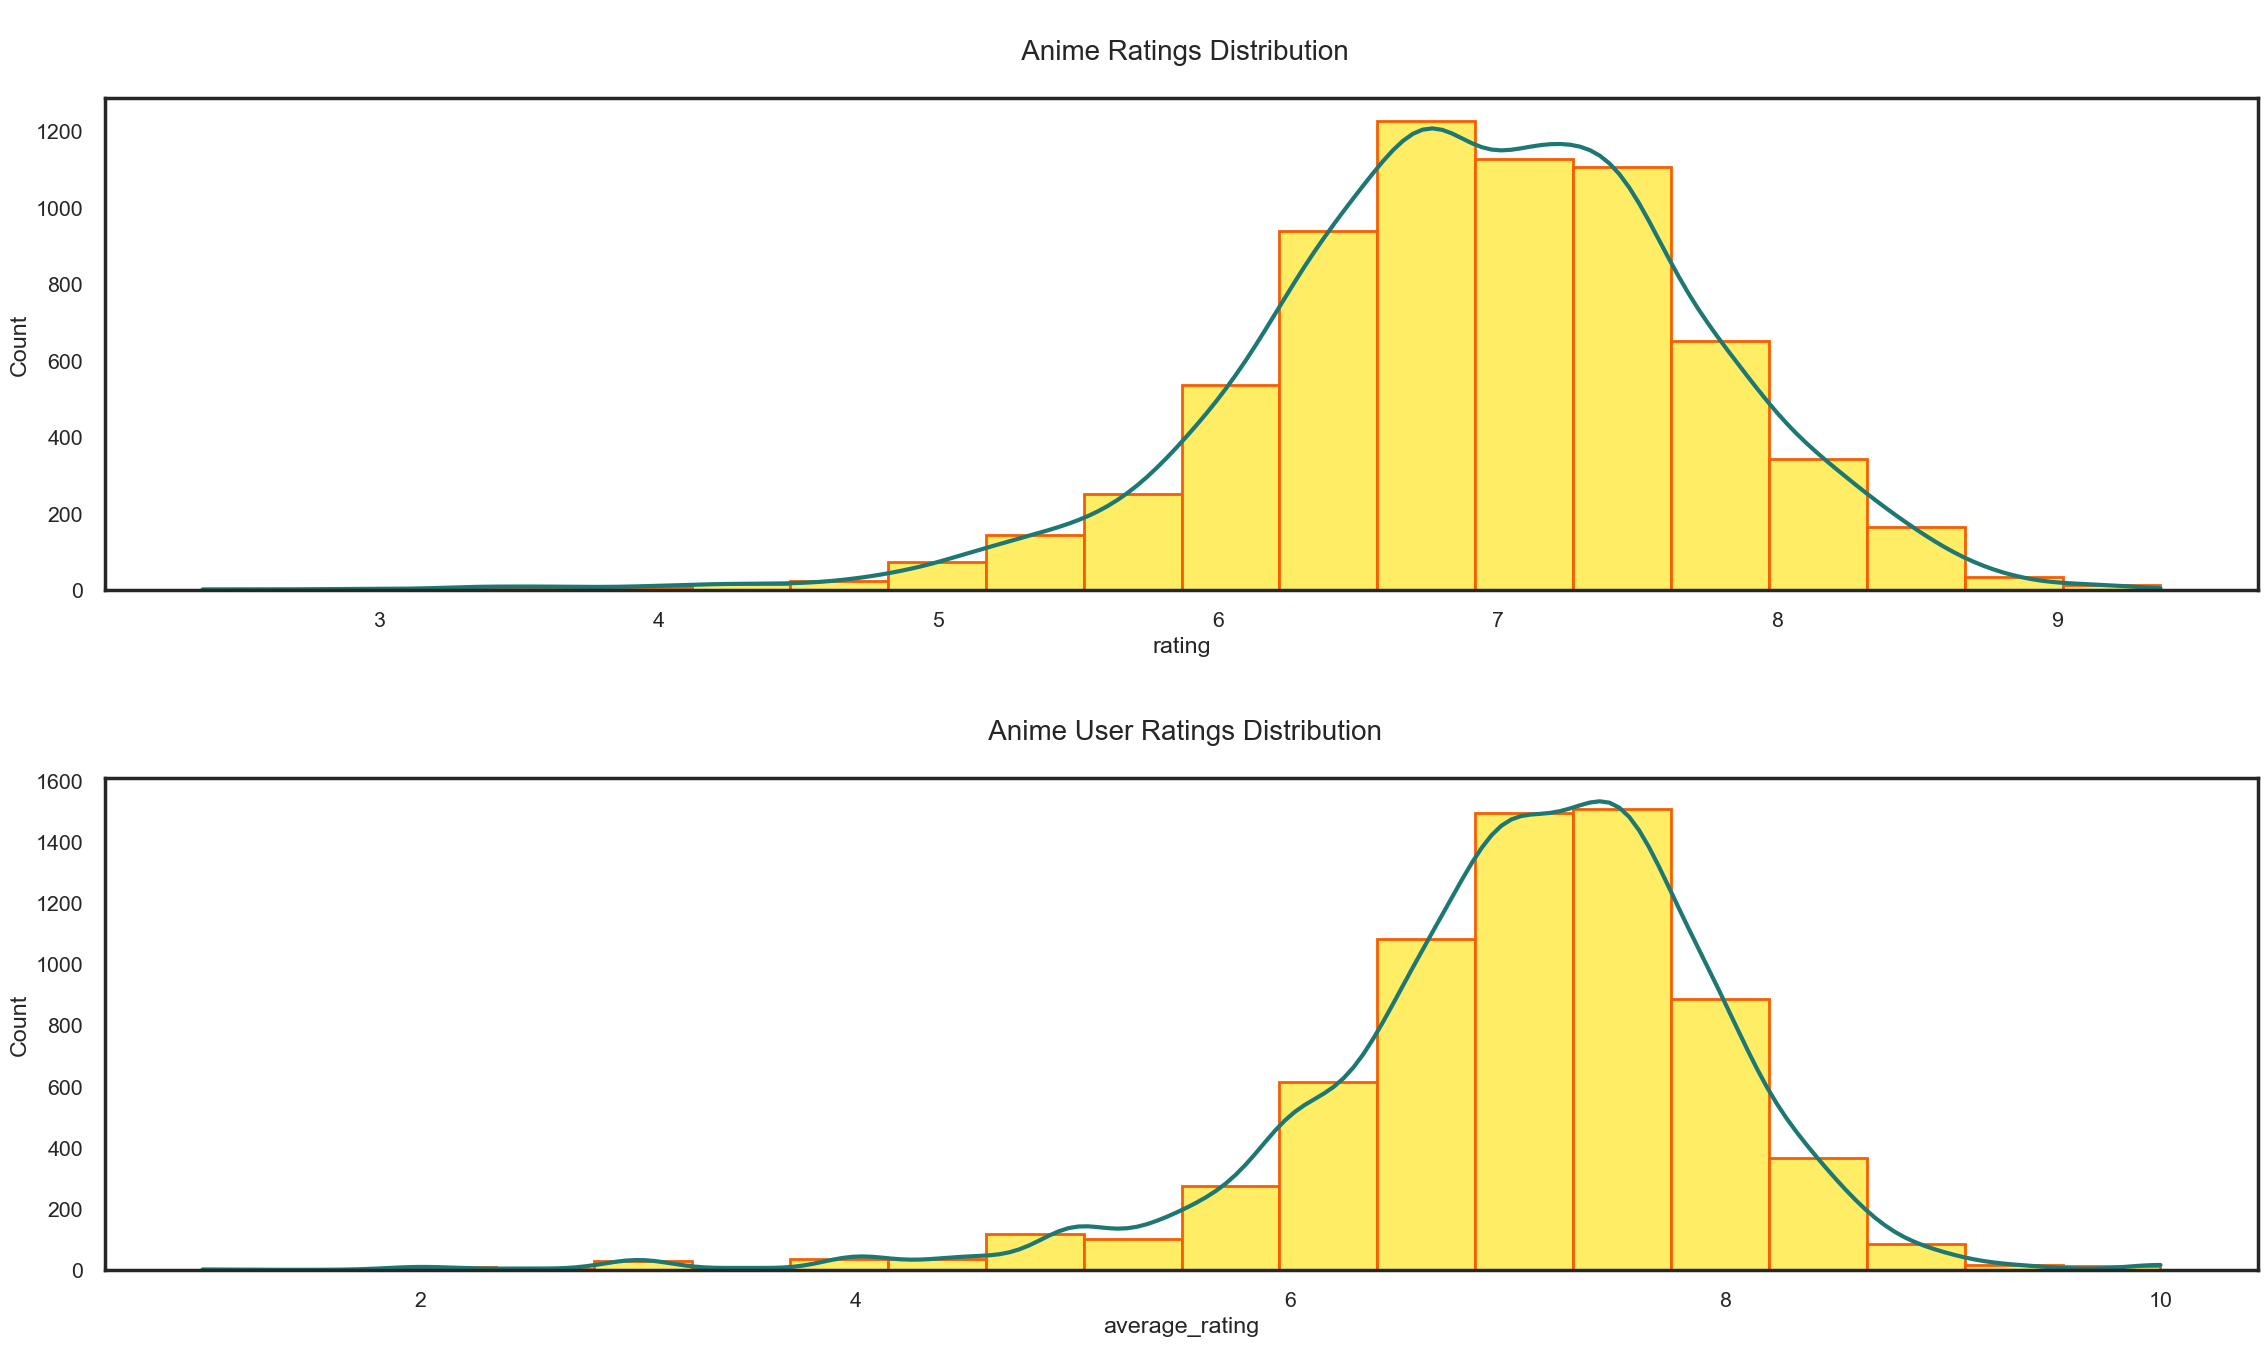

In [30]:
_, axs = plt.subplots(2,1,figsize=(25,15),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(set2["rating"],color=colors[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=colors[1])
axs[0].lines[0].set_color(colors[2])
axs[0].set_title("\n Anime Ratings Distribution\n",fontsize = 20)

sns.histplot(set2["average_rating"],color=colors[11],kde=True,ax=axs[1],bins=20,alpha=1,fill=True,edgecolor=colors[1])
axs[1].lines[0].set_color(colors[2])
axs[1].set_title("\n Anime User Ratings Distribution\n",fontsize = 20);

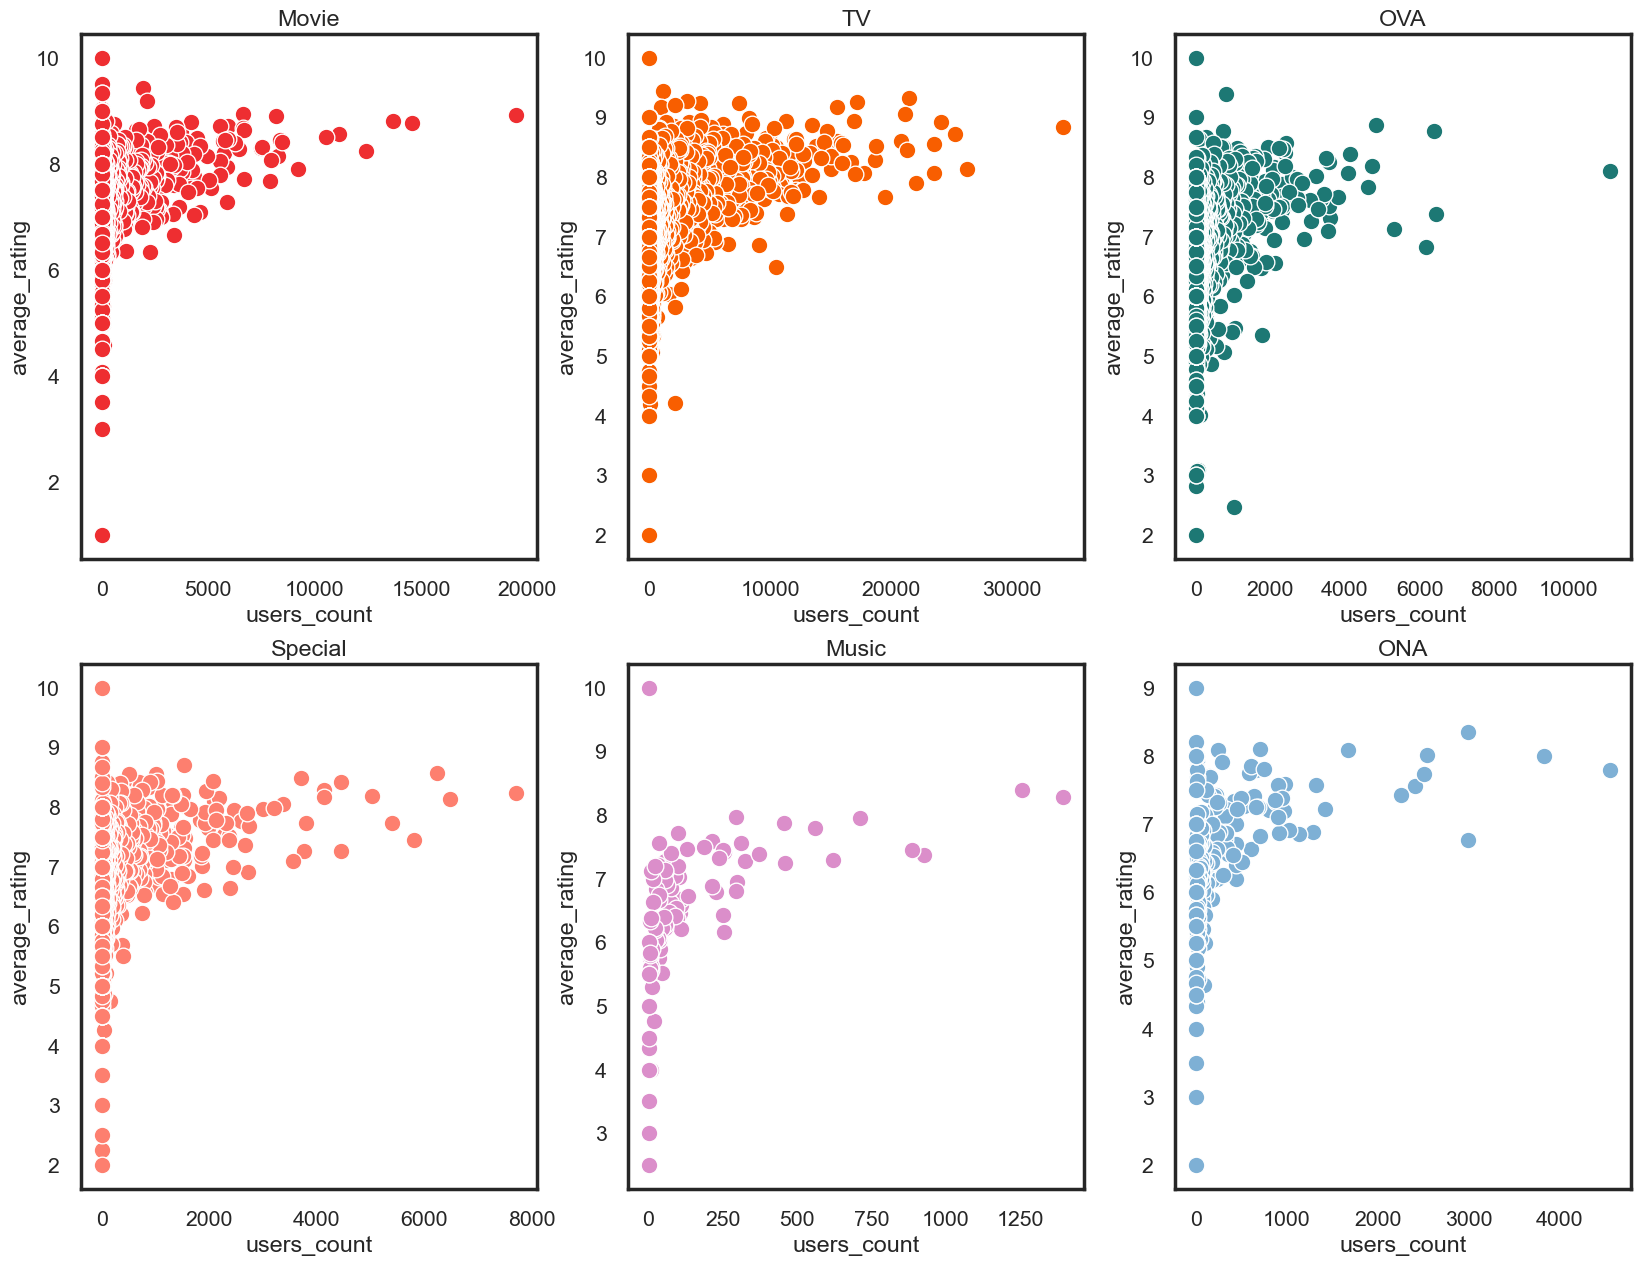

In [31]:
plt.figure(figsize=(20,15))

anime_type=anime_details['type'].unique()

for x,y in enumerate(anime_type):
    plt.subplot(2,3,x+1)
    types= set1[set1['type']==y]
    sns.scatterplot(x=types['users_count'],y=types['average_rating'],color=colors[x])
    plt.title(f'{y}')
   

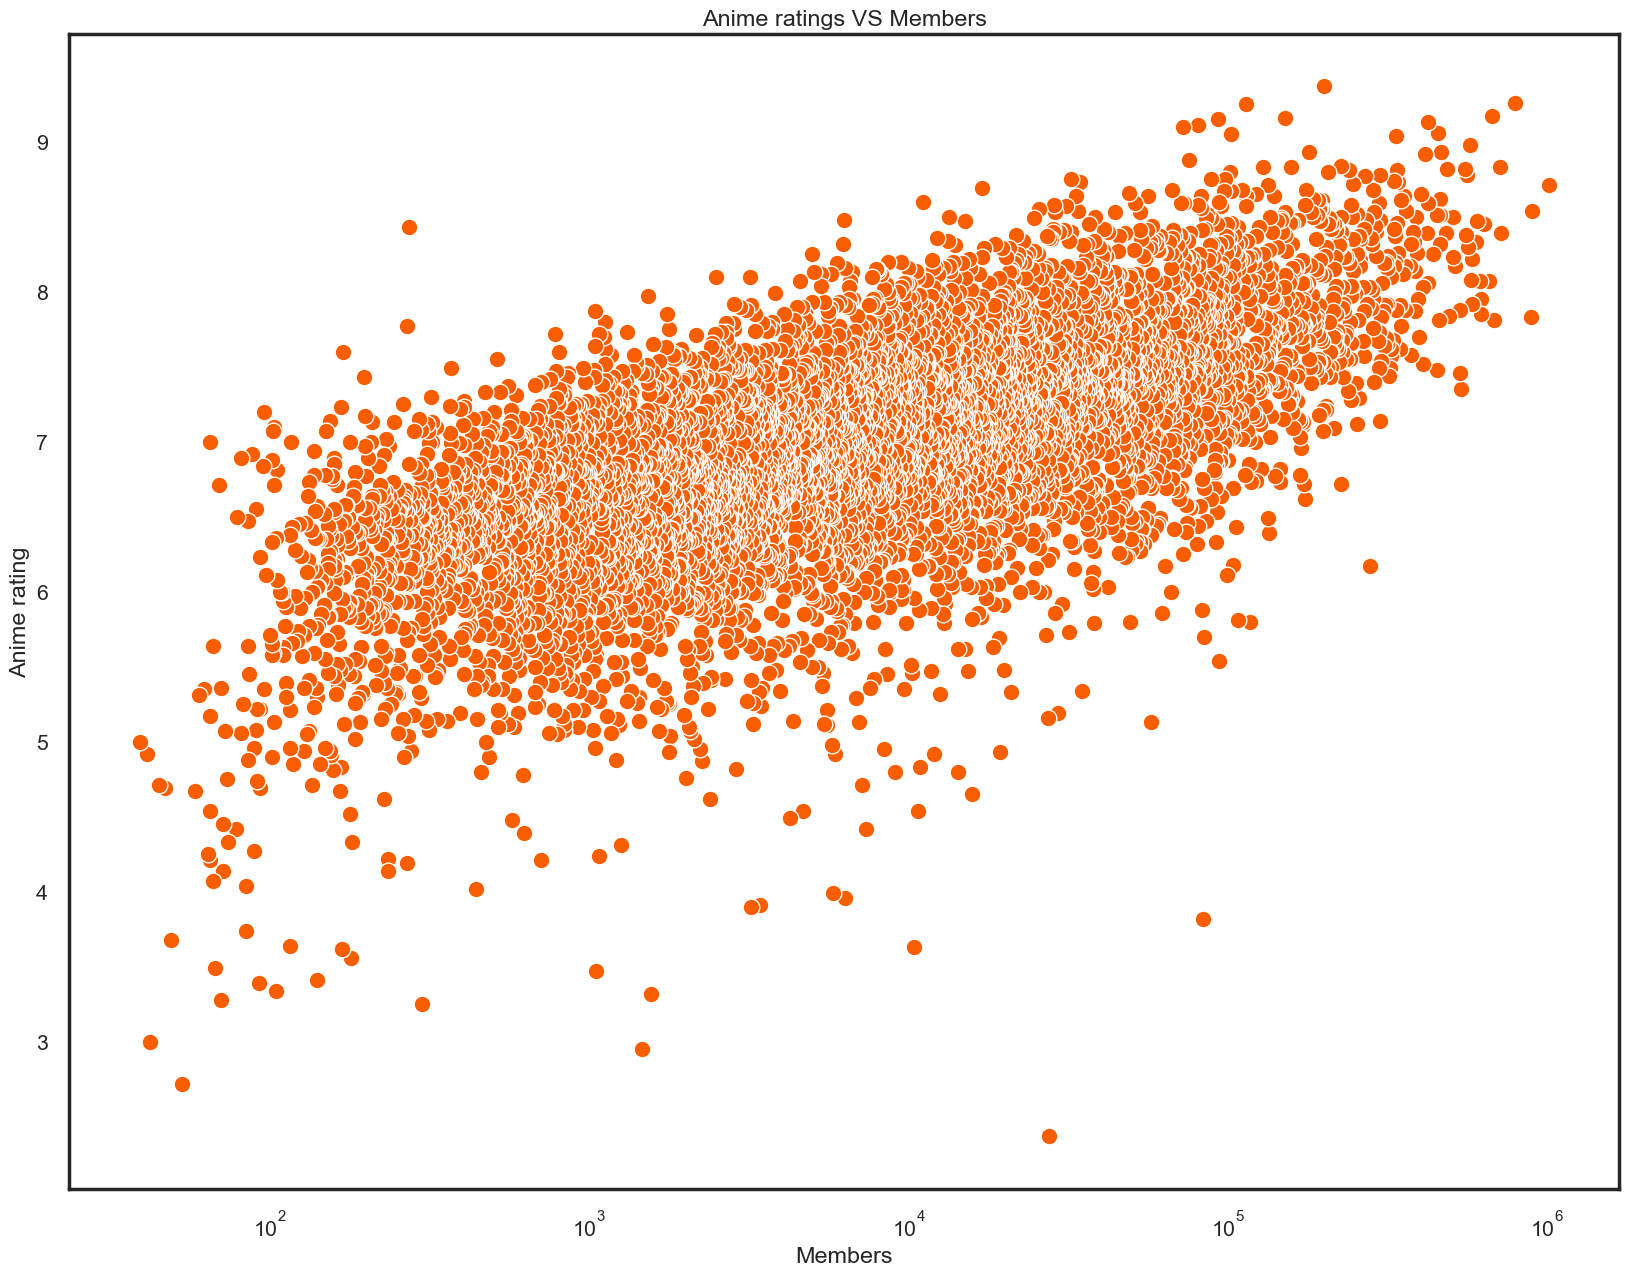

In [32]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=set1['total_members'],y=set1['rating'],color=colors[1])
ax=plt.gca(projection='polar')
ax.set_xscale('log')
plt.title('Anime ratings VS Members')
plt.xlabel('Members')
plt.ylabel('Anime rating')
plt.show()

**Final Preprocessing**

In [59]:
set3 = anime_merged_temp.copy()

le = LabelEncoder()

type_label = le.fit_transform(anime_merged_temp['type'])
type_mappings = {index: label for index, label in enumerate(le.classes_)}

studio_label = le.fit_transform(anime_merged_temp['studio'])
studio_mappings = {index: label for index, label in enumerate(le.classes_)}

print(type_mappings)

{0: 'Movie', 1: 'Music', 2: 'ONA', 3: 'OVA', 4: 'Special', 5: 'TV'}


In [60]:
set3['type'] = type_label
set3['studio'] = studio_label

set3.head().style.set_table_styles([headers,cells,caption]).set_caption("Let's take a look at the dataframe with encoded values")

,anime_id,name,genre,type,episodes,rating,total_members,studio,users_count,average_rating
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",5,26.000000,8.820000,486824,512,13449,8.869433
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",0,1.000000,8.400000,137636,87,5790,8.439724
2,6,Trigun,"Action, Comedy, Sci-Fi",5,26.000000,8.320000,283069,260,9385,8.419393
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",5,26.000000,7.360000,64905,512,2169,7.533426
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",5,52.000000,7.060000,9848,563,308,7.198052


In [63]:
genre_temp = set3['genre'].str.get_dummies(sep=', ')
set3 = pd.concat([set3, genre_temp], axis = 1)
set3.head().style.set_table_styles([headers,cells,caption]).set_caption("Let's take a look at the dataframe")

,anime_id,name,genre,type,episodes,rating,total_members,studio,users_count,average_rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",5,26.000000,8.820000,486824,512,13449,8.869433,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",0,1.000000,8.400000,137636,87,5790,8.439724,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,6,Trigun,"Action, Comedy, Sci-Fi",5,26.000000,8.320000,283069,260,9385,8.419393,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",5,26.000000,7.360000,64905,512,2169,7.533426,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",5,52.000000,7.060000,9848,563,308,7.198052,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
